In [28]:
%%writefile sample.dot
digraph Sausage_21_och_10_Clean {
  rankdir=LR;
  fontsize=12;
  labelloc="t";
  label="21 och 10";
  nodesep=0.35; ranksep=0.4;

  node [fontname="Helvetica", shape=box, style="rounded,filled", fillcolor="#F7F9FB", fontsize=11];
  edge [color=gray40, arrowsize=0.7];

  // Start and End
  START [shape=oval, label="start", fontsize=10, fillcolor="#EEF2F6"];
  END   [shape=oval, label="end",   fontsize=10, fillcolor="#EEF2F6"];

  // 21 variants
  tjugoen   [label="tjugoen"];
  tjugoett  [label="tjugoett"];
  tjuen     [label="tjuen"];
  tjuett    [label="tjuett"];
  tjugien   [label="tjugien"];
  tjugiett  [label="tjugiett"];

  // och
  och [label="och", fillcolor="#EAEFF5"];

  // 10 variants
  tio [label="tio"];
  tie [label="tie"];

  // Flow
  START -> tjugoen;  START -> tjugoett; START -> tjuen;  START -> tjuett; START -> tjugien; START -> tjugiett;

  tjugoen  -> och;  tjugoett -> och;  tjuen -> och;  tjuett -> och;  tjugien -> och;  tjugiett -> och;

  och -> tio;  och -> tie;

  tio -> END;  tie -> END;

  // Highlight canonical path
  edge [color="#2B6CB0", penwidth=2];
  START -> tjugoett;
  tjugoett -> och;
  och -> tio;
  tio -> END;
}


Overwriting sample.dot


In [29]:
!dot -Tpng sample.dot -o sample.png

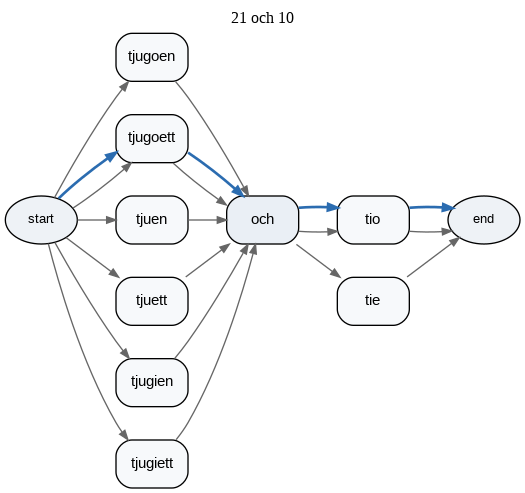

In [30]:
from IPython.display import Image
Image(filename='sample.png')